In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'

In [6]:
def mat2vec(A):
    h, w = A.shape
    a = np.zeros(h*w, dtype = A.dtype)
    A = np.flipud(A)
    for i, row in enumerate(A):
        a[i*w:i*w+w] = row
    return a

In [9]:
def vec2mat(a, shape):
    h, w = shape
    A = np.zeros(shape, dtype = float)
    for i in range(h):
        A[i, :] = a[i*w:i*w+w] 
    return np.flipud(A)

In [10]:
with np.load('data.npz') as data:
    A, C = data['A'], data['C']

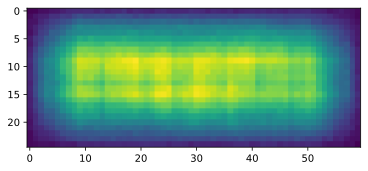

In [11]:
plt.imshow(A)

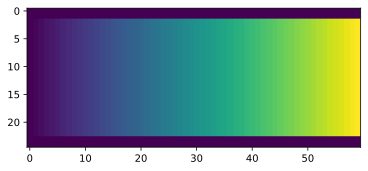

In [12]:
b = np.zeros((25, 60))
for i in np.arange(1,60):
    b[2:-2, i] = i
plt.imshow(b)

In [13]:
bvec = mat2vec(b) @ C

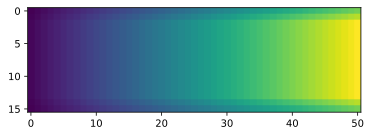

In [14]:
b1 = vec2mat(bvec, (16, 51))
plt.imshow(b1)

In [15]:
u, sigma, vt = np.linalg.svd(C)

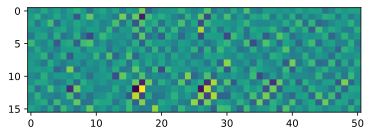

In [16]:
SigmaInv = np.zeros((816, 1500), dtype = float)
for i in range(len(sigma)):
    SigmaInv[i,i] = 1/sigma[i]
d = vt.T @ SigmaInv @ u.T @ mat2vec(A)
a0 = vec2mat(d, (16, 51))
plt.imshow(a0)

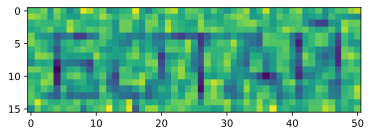

In [17]:
SigmaInv = np.zeros((816, 1500), dtype = float)
for i in range(350):
    SigmaInv[i,i] = 1/sigma[i]
d = vt.T @ SigmaInv @ u.T @ mat2vec(A)
a0 = vec2mat(d, (16, 51))
plt.imshow(a0)